### Installation


In [1]:
!pip install wfdb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)

import wfdb
import glob
import os

# Context
Cardiovascular Disease is the main cause of humain death, responsible for 31% of the world cide deaths in 2016. The major cause of the cardiac deaths is cardiac arrhythmia. The best equipment for monitoring and identifying arrhythmia is an electrocardiogram(ECG).

By recording ECG, analysing these features and classifying signals we can make assessments about the healthy state of the heart, diagnose certain diseases of the heart and predict whether a subject will go on to develop certain diseases.

ECG (Electrocardiogram) is non-stationary physiolocial signal representing electrical activity of heart. In other words, ECG is a periodic waveform that describes the action of heart as it moves.


In this project, we will classify ECG signals to make assessments about the health state of the heart. For this purpose, we use ensemble of three PhysioNet databases: MIT-BIH Arrhythmia Database, MIT-BIH Normal Sinus Rhythm Database, and The BIDMC Congestive Heart Failure Database.

- MIT-BIH Arrhythmia database (ARR-Database) consists of 48 half-hour ECG recording from people with cardiac arrhythmia problem. Each record was sampled at 360 hertz and contains two chanels. source [here](https://www.physionet.org/content/mitdb/1.0.0/ ).

- MIT-BIH Normal Sinus Rhythm Database (NSR-Database) consists of 18 long-tern ECG recording from people with normal sinus rhythms. Records in this databased were sampled at 128 hertz.
source [here](https://www.physionet.org/content/nsrdb/1.0.0/).

- BIDMC Congestive Heart Failure Database (CHF-Database) consists of 15 long-tern ECG recording from people with congestive heart failure. Records in this databased were sampled at 250 hertz. [source](https://www.physionet.org/content/chfdb/1.0.0/)


In [3]:
#!wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/

In [4]:
#!wget -r -N -c -np https://physionet.org/files/nsrdb/1.0.0/

In [5]:
#!wget wget -r -N -c -np https://physionet.org/files/chfdb/1.0.0/

See wave : https://www.physionet.org/lightwave/?db=mitdb/1.0.0


# List of exercises

# Ex1: Plot signals and show data

There files named "101.dat" and "101.hea" which are an human electrocardiogram (ECG) record of one person with cardiac arrhythmia (ARR) problem. These files are already existed in the environement.

1.1. Write a function named "load_record_using_wfdb(filename, start, end, channel)" which reads a channel of a record from "start" to "end". Note that each record has two channels. This function returns numpy array which contains data of the signal.

Specify the parameter "start" = 0.


Specify the parameter "end" = 2000


1.2 By using matplotlib package, plot the signal. The signal is periodic ? Its shape is the same of a sinusoidal wave ?

[Note] : Interesting to read the doc : https://wfdb.readthedocs.io/en/latest/io.html#module-wfdb.io


[Note] Pourquoi cette fonction ? Parce qu'on ne veut pas prendre le signal dans son intégralité mais seulement une sous partie pour travailler.

### 1.1 Solution

In [6]:
def load_signal_using_wfdb(file, start, end, channel, pn_dir):
    """
    file: name of record
    start: int
    end:int
    channel: 0 or 1
    """
    record = wfdb.rdrecord(file, sampfrom = start, sampto = end, channels=[channel], pn_dir=pn_dir)
    data = record.p_signal.reshape(-1)
    return data

Pourquoi reshape -1 ? Explication: https://www.logilax.com/numpy-reshape-minus-one/#:~:text=In%20NumPy%2C%20%2D1%20in%20reshape,elements%20to%20a%201D%20array.


### Affichage de différents signaux

#### mitdb enregistrement 103 channel 0

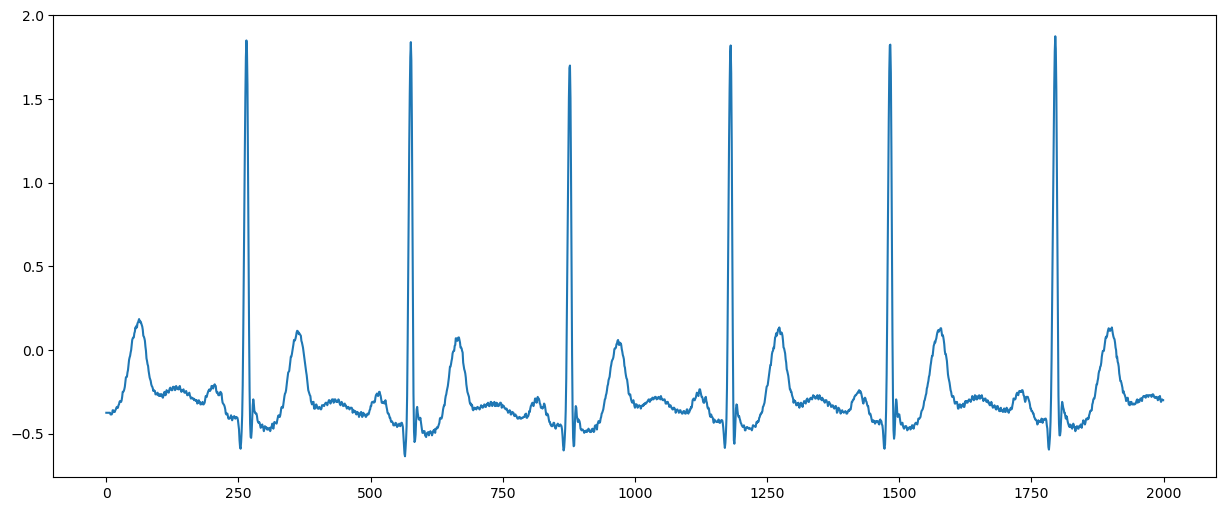

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

signal = load_signal_using_wfdb('103', start=0, end=2000, channel = 0, pn_dir='mitdb')

fig, ax = plt.subplots(figsize=(15,6))
plt.plot(signal)


#### mitdb enregistrement 103 channel 0 et 1

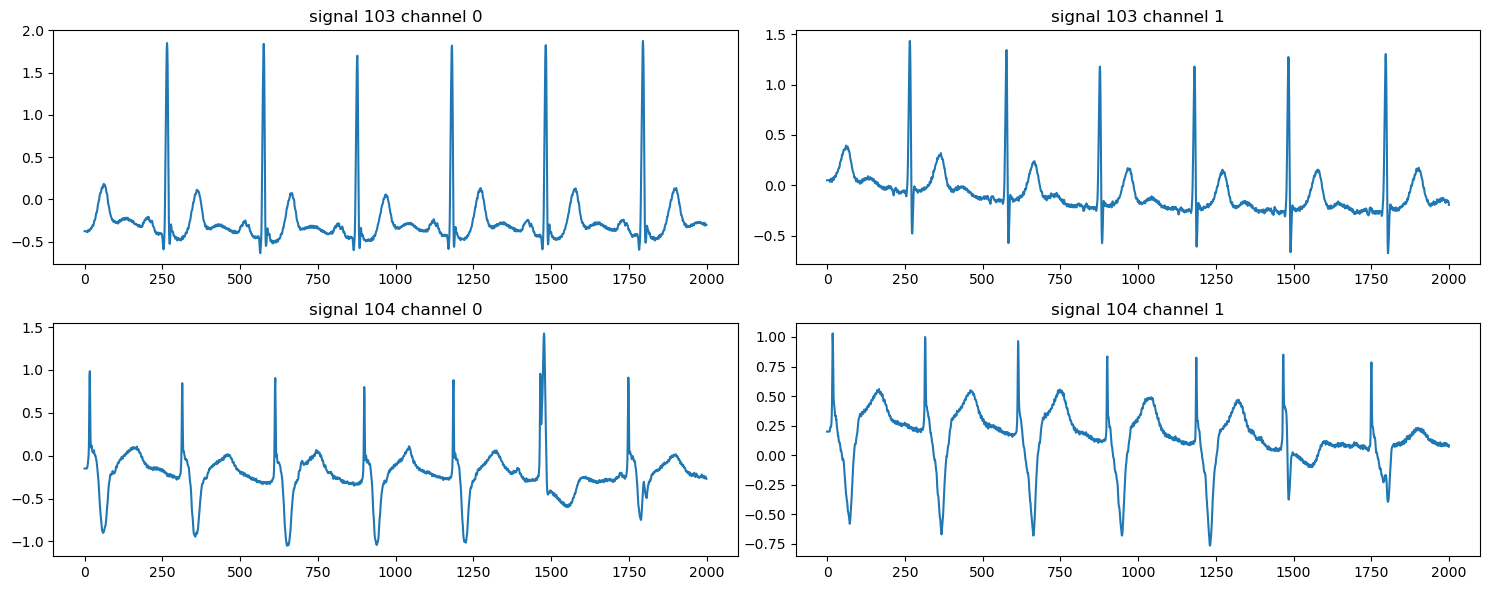

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

signal_00 = load_signal_using_wfdb('103', start=0, end=2000, channel = 0, pn_dir='mitdb')
signal_01 = load_signal_using_wfdb('103', start=0, end=2000, channel = 1, pn_dir='mitdb')
signal_10 = load_signal_using_wfdb('104', start=0, end=2000, channel = 0, pn_dir='mitdb')
signal_11 = load_signal_using_wfdb('104', start=0, end=2000, channel = 1, pn_dir='mitdb')

# Create a figure and 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 6))  # 2x2 grid of subplots

# Plot data on each subplot
axs[0, 0].plot(signal_00)
axs[0, 0].set_title("signal 103 channel 0")

axs[0, 1].plot(signal_01)
axs[0, 1].set_title("signal 103 channel 1")

axs[1, 0].plot(signal_10)
axs[1, 0].set_title("signal 104 channel 0")

axs[1, 1].plot(signal_11)
axs[1, 1].set_title("signal 104 channel 1")

# Adjust the layout so titles/labels don't overlap
plt.tight_layout()

# Display the figure with subplots
plt.show()

#### nsrdb enregistrement 16265 channel 0

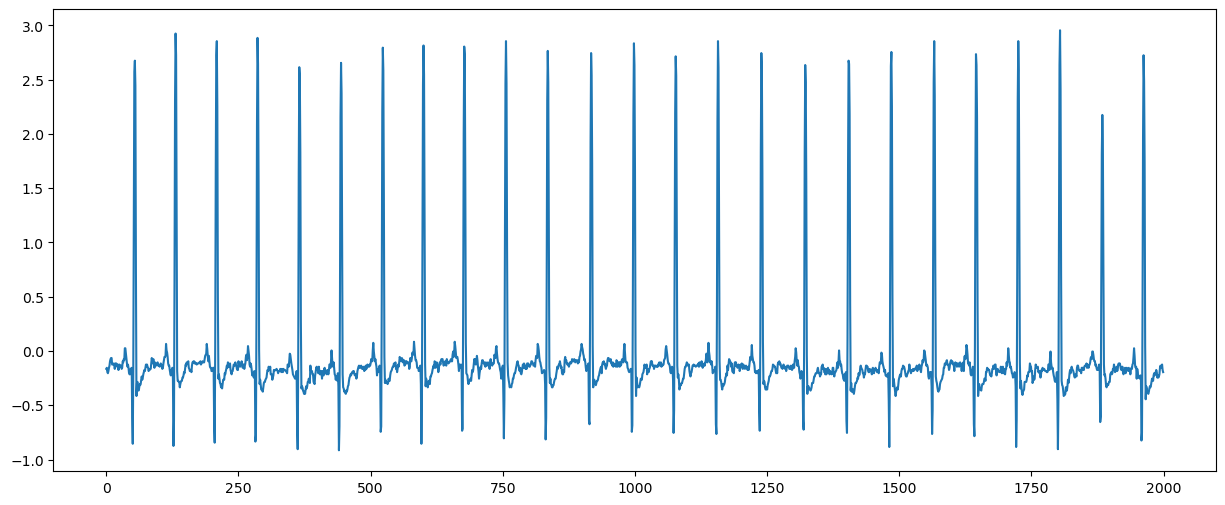

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

signal = load_signal_using_wfdb('./dataset/mit-bih-normal-sinus-rhythm-database/16265', start=0, end=2000, channel = 0, pn_dir="nsrdb")

fig, ax = plt.subplots(figsize=(15,6))
plt.plot(signal)


#### dataset chfdb enregistrement chf01 channel 0

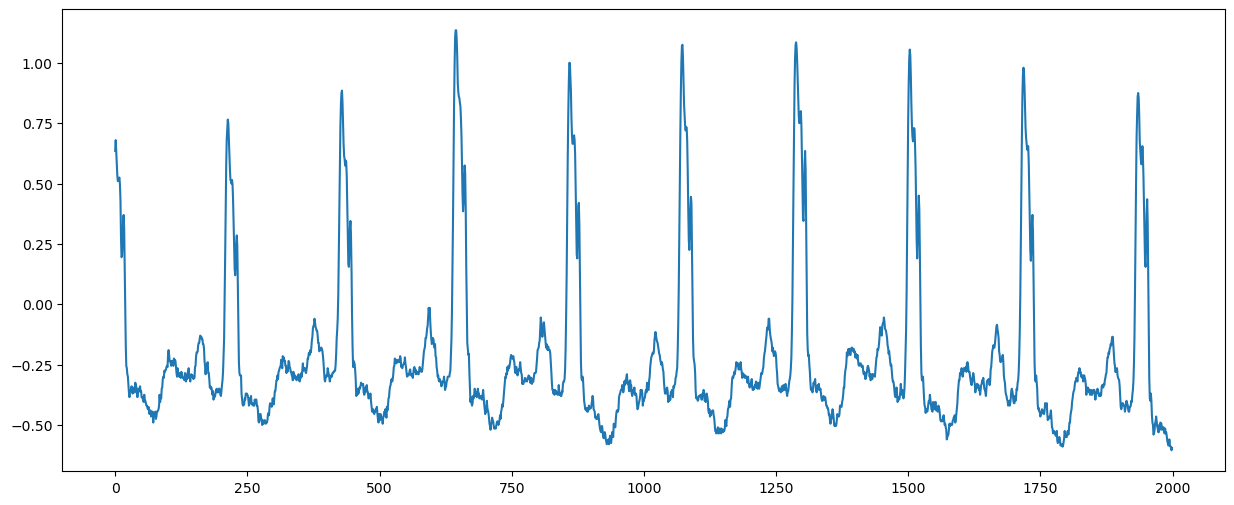

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

signal = load_signal_using_wfdb('chf01', start=0, end=2000, channel = 0, pn_dir="chfdb")

fig, ax = plt.subplots(figsize=(15,6))
plt.plot(signal)

1.2. Le signal est une fonction quasi périodique, le signal se répète de la même manière mais n'est pas quasiment identique.
 exemples de signaux quasi périodiques :
- La parole humaine
- La musique
- Les signaux électriques

(https://www.researchgate.net/publication/228483890_Fuzzy_sets_of_quasi-periodic_signals#:~:text=A%20quasi%2Dperiodic%20signal%20is,of%20a%20musical%20instrument%2C%20etc.)

Le signal n'est pas exatement une sinusoïde mais à un comportement sinusoïdale.

# Ex2: Cut up signal
2.1.  Write a function named "split_vecto_into_chunk" that splits an array vector into chunks of size N. It takes as arguments a vector and size of chunk and returns a list of its chunks.

2.2.  ECG signals record frequently for a long period of time at different sampling rates.

Write function named "cut_signal_into_segments(signal, sampling_rate, duration_segment)" which allows to cut up a signal into shorter segments of a specified duration. This function returns a list of segments.

Note that:
        number_of_samples = sampling_rate*duration.



[Note] Fréquence d'échantillonnage (Sampling rate) : L'échantillonnage consiste généralement à relever à intervalle régulier la valeur d'une grandeur physique. La fréquence d'échantillonnage est le nombre d'échantillons par unité de temps.

[Note] : Le sampling rate de chaque signal est indiqués plus haut dans la partie 1.

[Conseil] : Essayez d'afficher le signal original avec les parties du signal coupées en dessous pour que ce soit plus parlant.

## Solution

In [11]:
def split_vector_into_chunk(vector, size_chunk:int):
    len_vector = len(vector)
    num_chunks = int(len_vector//size_chunk)

    list_chunks = []
    for i in range(0, num_chunks*size_chunk, size_chunk):
        list_chunks.append(vector[i:i+size_chunk])

    return list_chunks


### Test (check function)

J'ai un vecteur de 13 valeurs, je veux découper ce vecteur en chunk de 2 éléments.    
Je fais donc le calcul : taille du vecteur / taille du chunk => cela me donne le nombre de chunk que j'aurais à la fin.  
Ici 13 / 2 = 6

In [12]:
import numpy as np
list_vectors = [np.array([1,2]), np.array([1,2,3,4,5,6,7,8,9,10, 11, 12, 13]), np.random.rand(5)]

for vector in list_vectors:
    result = split_vector_into_chunk(vector, 2)
    print(result)

[array([1, 2])]
[array([1, 2]), array([3, 4]), array([5, 6]), array([7, 8]), array([ 9, 10]), array([11, 12])]
[array([0.5210681 , 0.67348142]), array([0.08820326, 0.35742277])]


La fonction cut_signal_into_segments permet de couper un signal en différents segments d'une durée donnée.

In [13]:
def cut_signal_into_segments(signal, sampling_rate, duration):
    num_samples_received_after_duration = duration*sampling_rate
    return split_vector_into_chunk(signal, num_samples_received_after_duration)

number_samples_received_after_duration = number of samples in one chunk  
Après une durée de une seconde, combien de valeurs j'aurais dans mon array ?   
Si j'ai un sampling rate de 360 Hz, cela veut dire que j'aurais 360 valeurs dans mon array après une seconde.

## Test

Si j'ai un sampling rate de 360 Hz cela veut dire que j'ai 360 valeurs pour une seconde d'enregistrement.
  
Si grâce à ma fonction load_signal_using_wfdb je prends un enregistement partant du début (start = 0) et allant jusqu'à la 2000ème valeur (end = 2000), en combien je vais découper mon signal si je prends une durée d' 1 seconde ?

In [14]:
print(2000 / 360)

5.555555555555555


Appliquons notre fonction cut_signal_into_segments. Je veux couper mon signal en segment de 1 seconde :

In [15]:
signal = load_signal_using_wfdb('103', start=0, end=2000, channel = 0, pn_dir="mitdb")
t = cut_signal_into_segments(signal,360, 1)
print(len(t))

5


J'ai bien 5 segments in fine.

On peut s'assurer que le signal a bien été découppé en affichant le signal d'origine et les segments obtenus.

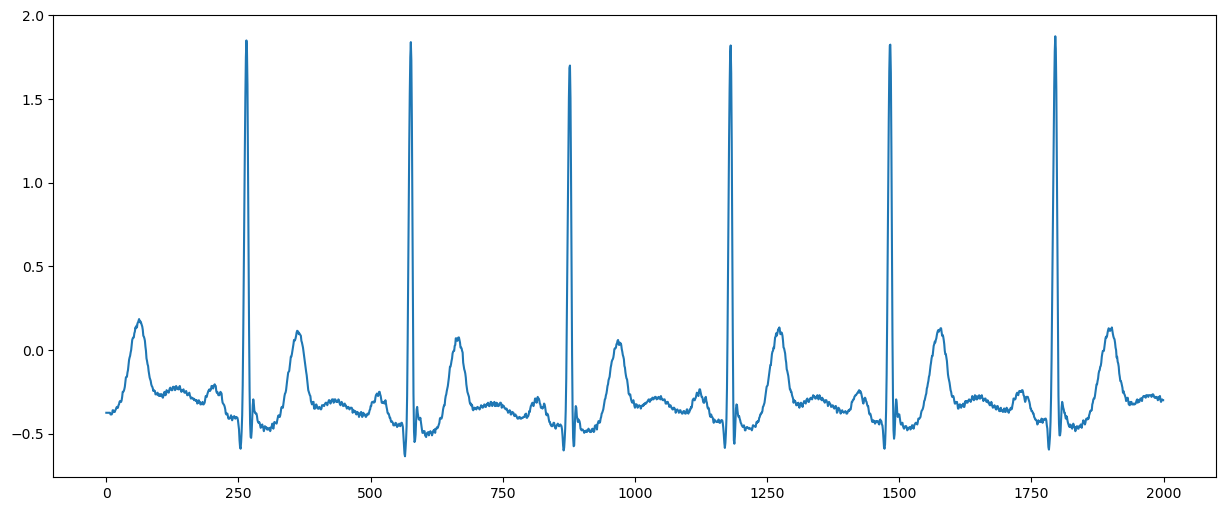

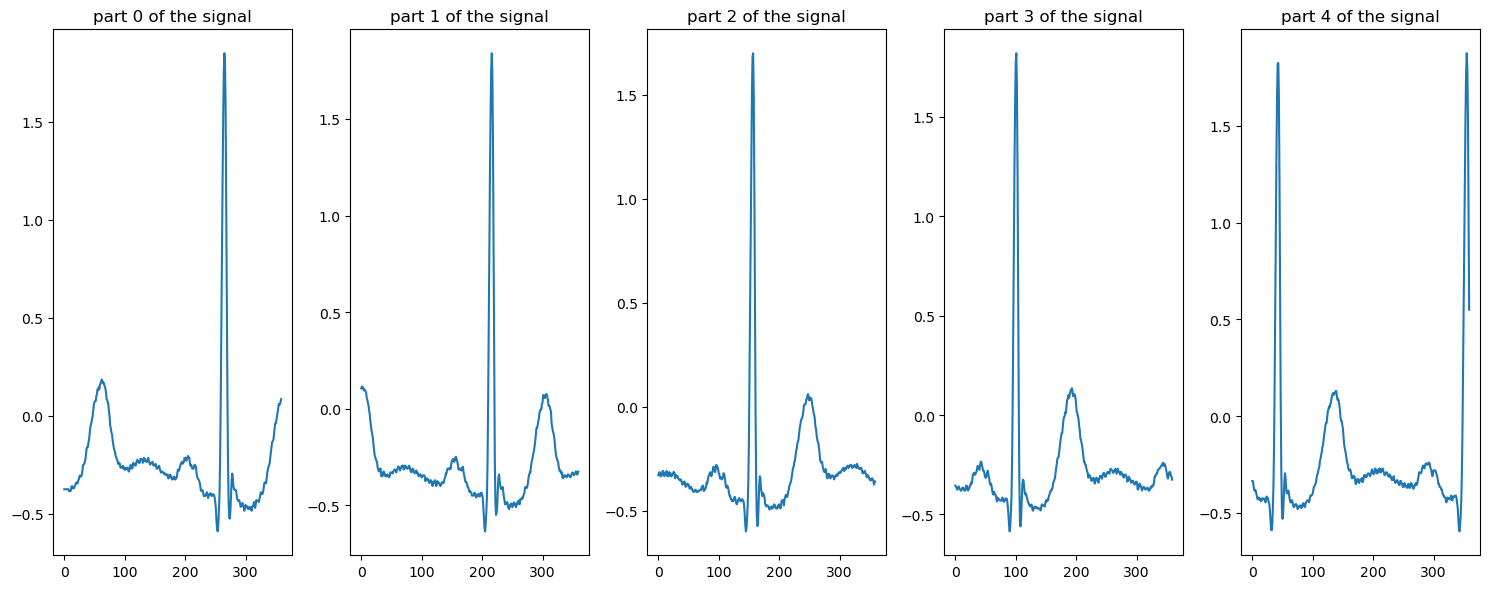

In [16]:
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(signal_00)

fig, axs = plt.subplots(1, 5, figsize=(15, 6))

for i in range(len(t)):
  axs[i].plot(t[i])
  axs[i].set_title(f"part {str(i)} of the signal")

# Adjust the layout so titles/labels don't overlap
plt.tight_layout()

plt.show()

# Ex3:  Synchronize data
These records from different database were digitized at different frequences.
We recall that ECG records of ARR-Database were sampled at 360 Hz, those of CHF Database at 250 Hz and those of NSR Database at 128Hz.

3.1. With SCIPY package, write a function named "synchronize_signal" which resamples signal at any sampling rate to a common rate (for example 128 Hz). It takes as arguments a signal and its sampling rate and new sampling rate that we want to resample.

3.2.  Plot the original and resampled signals on the same figure (using subplot of matplotlib).


## Solution

Imaginons que j'ai 2 signaux de 2 secondes, un avec un sampling rate de 3 Hz et un avec un sampling rate de 6 Hz.     
Combien aurais-je de valeur dans mon array 1 et 2 ?
- array1 => 6 valeurs     
- array2 => 12 valeurs   

Je souhaite maintenant qu'ils aient le même sampling rate de 3 Hz. Je veux donc que mes 2 signaux (donc mes 2 arrays) et le même nombre de valeurs. En l'occurence 12.  

la méthode resample de scipy_signal nécessite le nombre de samples finale voulus pour l'enregistrement. Pour calculer cette valeur à partir du sampling rate du signal et du sampling rate désiré, c.a.d le common_sampling_rate il nous suffit en gros de trouver la durée du signal.


On peut retrouver la durée du signal de cette manière :

durée = len(signal)/sampling_rate     

Une fois qu'on a la durée du signal il nous suffit de multiplier par le sampling rate désiré pour avoir le nombre de samples final.

nb_samples = durée * common_sampling_rate.  

Au final,

nb_samples = common_sampling_rate * len(signal) / sampling_rate

In [17]:
def synchronize_signal(signal, sampling_rate, common_sampling_rate):
    from scipy import signal as scipy_signal
    print(f"longueur du signal : {len(signal)}")
    num_samples = int((common_sampling_rate*len(signal))/sampling_rate)
    signal_resampled = scipy_signal.resample(signal, num_samples)

    return signal_resampled

### Test

J'ai des signaux avec plusieurs sampling rate différents.  
Prenons l'exemple de signaux avec un sampling rate de 1.  
Imaginons que je veuille descendre à un sampling rate de 2/3.   

Ici je ne connais pas la durée précise du signal qui peut varier d'un signal à l'autre.  

Si j'ai un array de 3 valeurs avec un sampling rate de 1 Hz, cela veut dire que mon signal dure 3 secondes. Je veux avoir un sampling rate de 2/3 donc au final j'aurais un nombre de samples = durée * 2/3, soit 2.

In [18]:
list_signals = [np.array([0,1,2,3,4,5,6]), np.array([1,2,3]), np.array([1,2,3,4,5,6,7,8,9,10])]
for signal in list_signals:
    signal_resampled = synchronize_signal(signal, 1, 2/3)
    print(signal_resampled)

longueur du signal : 7
[1.        1.9234786 3.        6.0765214]
longueur du signal : 3
[1. 3.]
longueur du signal : 10
[ 2.5         2.64266616  4.02662958  6.5         6.97337042 10.35733384]


On note que c'est arrondi à l'entier inférieur. Normal au vue de la formule utilisée au dessus.

### Test

In [19]:
signal_arr = load_signal_using_wfdb('207', start=0, end=2000, channel = 0, pn_dir='mitdb')
signal_resampled = synchronize_signal(signal_arr, 360, 128 )

longueur du signal : 2000


Si j'ai un signal avec un sampling rate de 360 Hz et que je veux le resample a 128 Hz cela veut dire que je vais diminuer mon nombre de sample par seconde. J'aurais à priori une courbe plus lisse après le resampling (normal j'aurais moins de valeurs) si je compare les 2 signaux.  

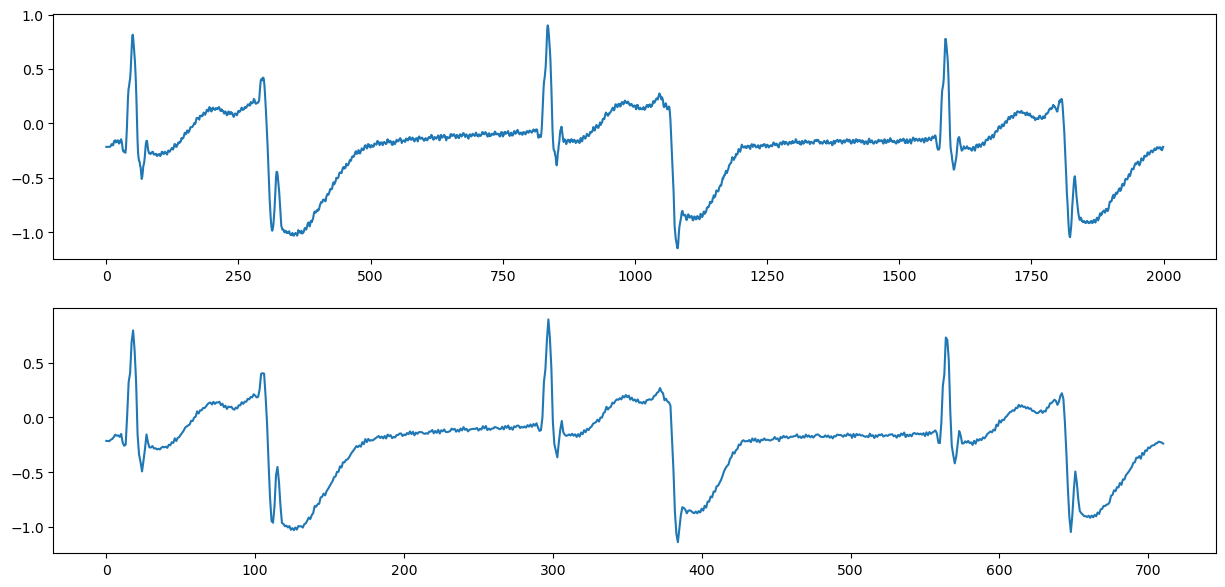

In [20]:
fig1, ax1 = plt.subplots(2, figsize=(15,7))
ax1[0].plot(signal_arr)
ax1[1].plot(signal_resampled)
plt.show()


C'est bien ce qu'on observe.

On peut s'en convaincre une nouvelle fois en diminuant éxagérément le common_sampling_rate.

longueur du signal : 2000


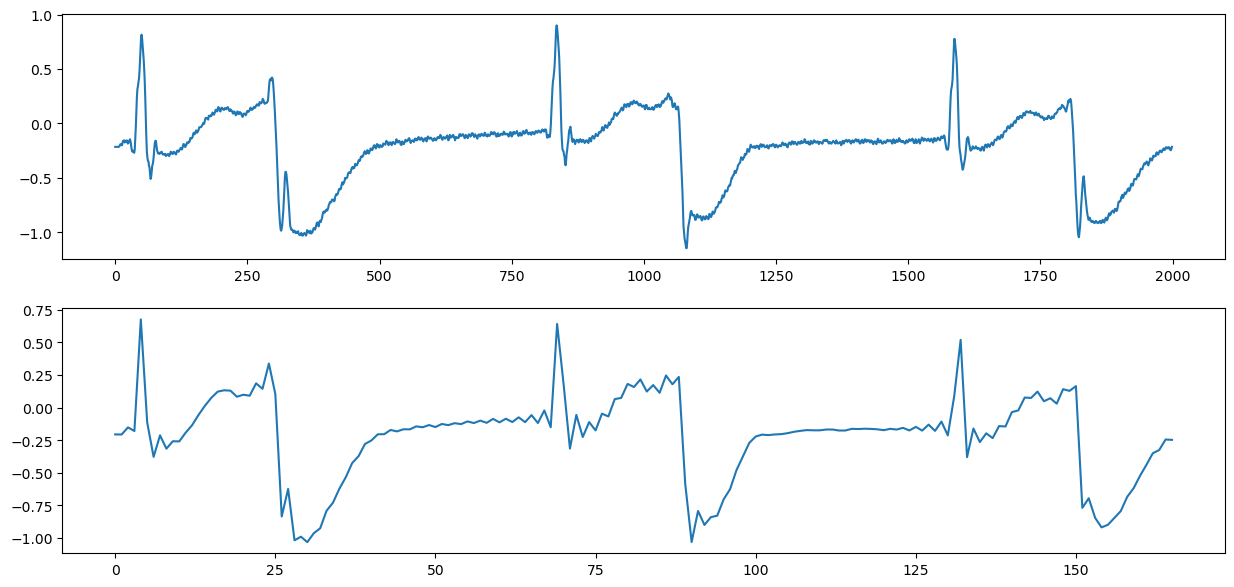

In [21]:
signal_arr_test = load_signal_using_wfdb('207', start=0, end=2000, channel = 0, pn_dir='mitdb')
signal_resampled_test = synchronize_signal(signal_arr_test, 360, 30 )
fig1, ax1 = plt.subplots(2, figsize=(15,7))
ax1[0].plot(signal_arr_test)
ax1[1].plot(signal_resampled_test)
plt.show()

# Ex4) Remove noise
ECG signals frequently contain some noise. There are many reasons for this:
- Activity of other body muscles
- Baseline shift because of respirators
- Poor contact of electrode
- Equiment ...

It's important to remove noise from signals. The common frequencies of the important components on the ECG from 0.5Hz - 100Hz.

An array signal named "signal_arr" is loaded in the environement.


4.1.  We note that a low pass filter that allows to passes signals with a frequency lower than a selected cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency.


Using scipy.butter, design a low pass filter which filters out frequencies larger than 100Hz. Apply it to signal_arr.



4.2. Similarly, A high pass filter is used to isolate the signals which have frequencies lower than the cutoff frequency.

Design a high pass filter which filters out frequencies smaller than 0.5 Hz. Apply it to signal_arr.



4.3.  A band-pass filter can be formed by cascading a high-pass filter and a low-pass filter.

Design a band-pass filter which filters out frequencies out of range 0.5Hz - 100Hz. Apply it to signal_arr.

4.4.  Plot these signals on the same figure (using the method "matplotlib.pyplot.subplots"). Do you have any comments on the mangitude of these signals ? Did the shape of the origine signal change after passing through one of these filter ?

## Solution

#### Test filtres

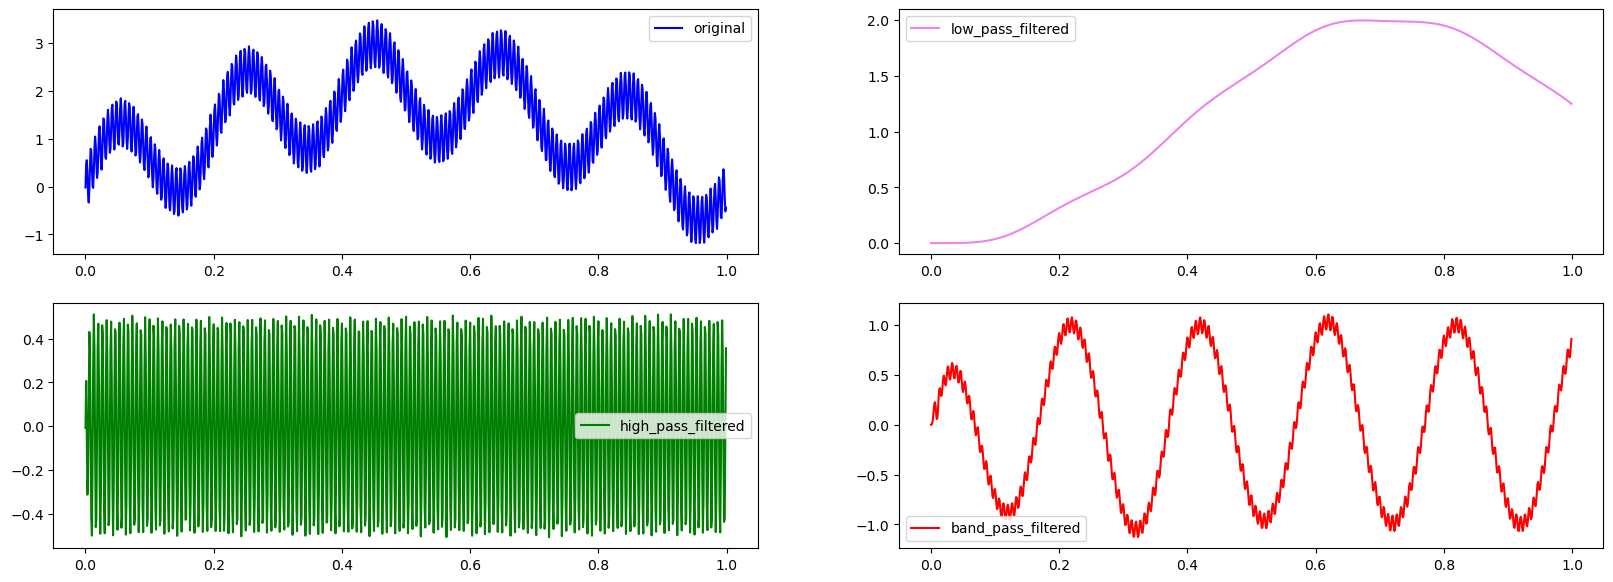

In [22]:
import numpy as np
from scipy import signal

order = 4
fs = 1000.0
lowcut = 2
highcut = 100.0

t = np.linspace(0, 1, 1000, False)  # Time vector
data = 2 * np.sin(2 * np.pi * 0.5 * t) + np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 150 * t) + 0.01 * np.random.randn(len(t))

w_low = lowcut / (fs / 2) # Normalize the frequency
b, a = signal.butter(N=order, Wn = w_low, btype='lowpass')
lp_filtered_data = signal.lfilter(b, a, data)

w_high = highcut / (fs / 2) # Normalize the frequency
b, a = signal.butter(N=order, Wn = w_high, btype='highpass')
hp_filtered_data = signal.lfilter(b, a, data)
b, a = signal.butter(order, [w_low, w_high], btype='bandpass')
bp_filtered_data = signal.lfilter(b, a, data)

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 7))

plt.subplot(221)
plt.plot(t, data, 'b-', label='original')
plt.legend()

plt.subplot(222)
plt.plot(t, lp_filtered_data, 'violet', label='low_pass_filtered')
plt.legend()

plt.subplot(223)
plt.plot(t, hp_filtered_data, 'g-', label='high_pass_filtered')
plt.legend()

plt.subplot(224)
plt.plot(t, bp_filtered_data, 'r-', label='band_pass_filtered')
plt.legend()

plt.show()

#### DFT

In [23]:
def DFT(x):
    """
    Function to calculate the
    discrete Fourier Transform
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(e, x)

    return X

def plot_dft(x, sr):
  X = DFT(x)

  # calculate the frequency
  N = len(X)
  n = np.arange(N)
  T = N/sr
  freq = n/T

  n_oneside = N//2
  # get the one side frequency
  f_oneside = freq[:n_oneside]

  # normalize the amplitude
  X_oneside =X[:n_oneside]/n_oneside

  plt.figure(figsize = (12, 6))
  plt.subplot(131)
  plt.stem(f_oneside, abs(X_oneside), 'b', \
          markerfmt=" ", basefmt="-b")
  plt.xlabel('Freq (Hz)')
  plt.ylabel('DFT Amplitude |X(freq)|')

  plt.subplot(132)
  plt.stem(f_oneside, abs(X_oneside), 'b', \
          markerfmt=" ", basefmt="-b")
  plt.xlabel('Freq (Hz)')
  plt.xlim(-1, 25)
  plt.tight_layout()

  plt.subplot(133)
  plt.stem(f_oneside, abs(X_oneside), 'b', \
          markerfmt=" ", basefmt="-b")
  plt.xlabel('Freq (Hz)')
  plt.xlim(25, 75)

  plt.show()


In [24]:
signal_arr = load_signal_using_wfdb('207', start=0, end=100, channel = 0, pn_dir='mitdb')

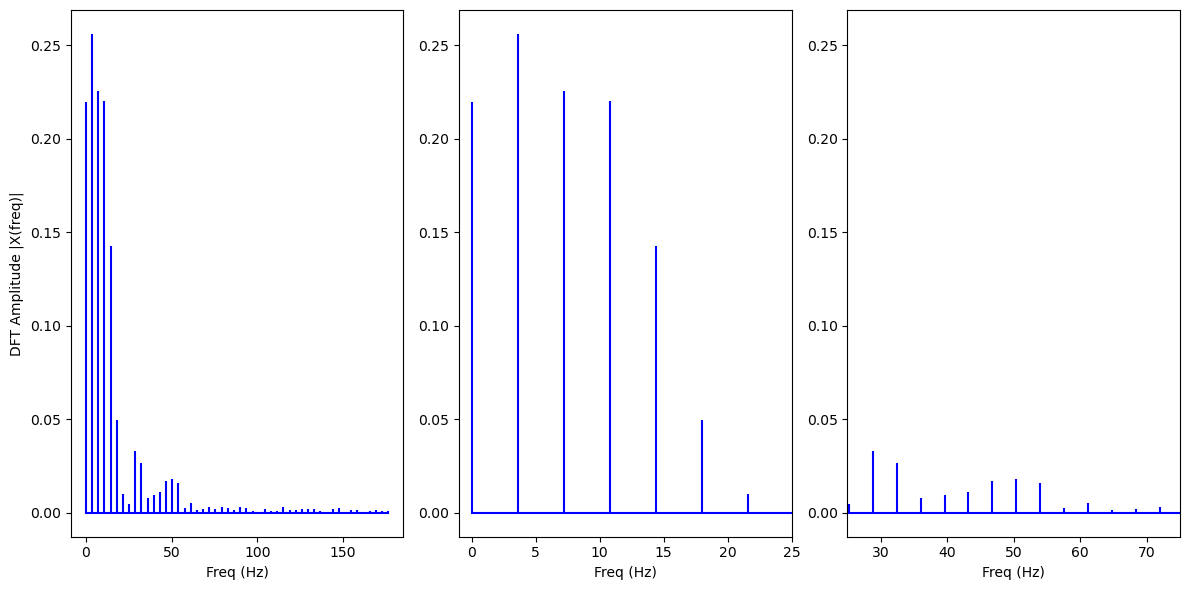

In [25]:
plot_dft(signal_arr, 360)

#### Filtre passe bas, passe haut et passe bande

In [26]:
signal_arr = load_signal_using_wfdb('207', start=0, end=2000, channel = 0, pn_dir='mitdb')

Il ne faut pas utiliser un filtre analogique mais digital : https://dsp.stackexchange.com/questions/49460/apply-low-pass-butterworth-filter-in-python

In [27]:
from scipy import signal as scipy_signal
highpass = 10
lowpass = 5

# highpass = 100
# lowpass = 0.5

order = 6 # Marche bien avec 1 et 3

fc = lowpass  # Cut-off frequency of the filter
w_low = fc / (360 / 2) # Normalize the frequency

b, a = scipy_signal.butter(N=order, Wn = w_low, btype='lowpass', analog=False)
lp_filtered_data = scipy_signal.lfilter(b, a, signal_arr)

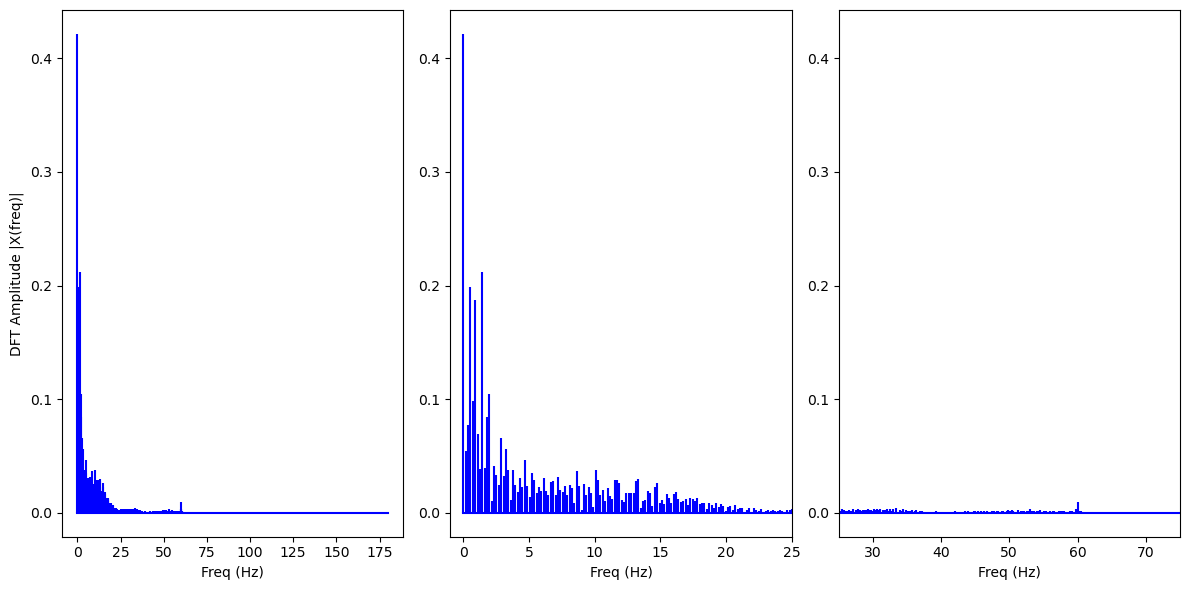

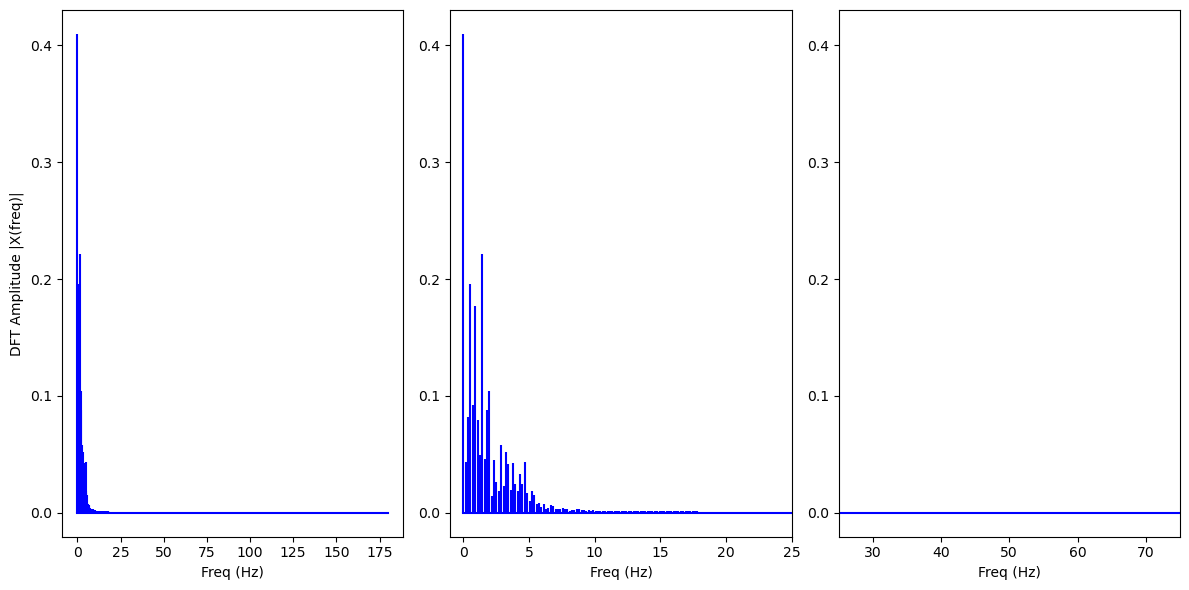

In [28]:
plot_dft(signal_arr, 360)
plot_dft(lp_filtered_data, 360)


#### plot

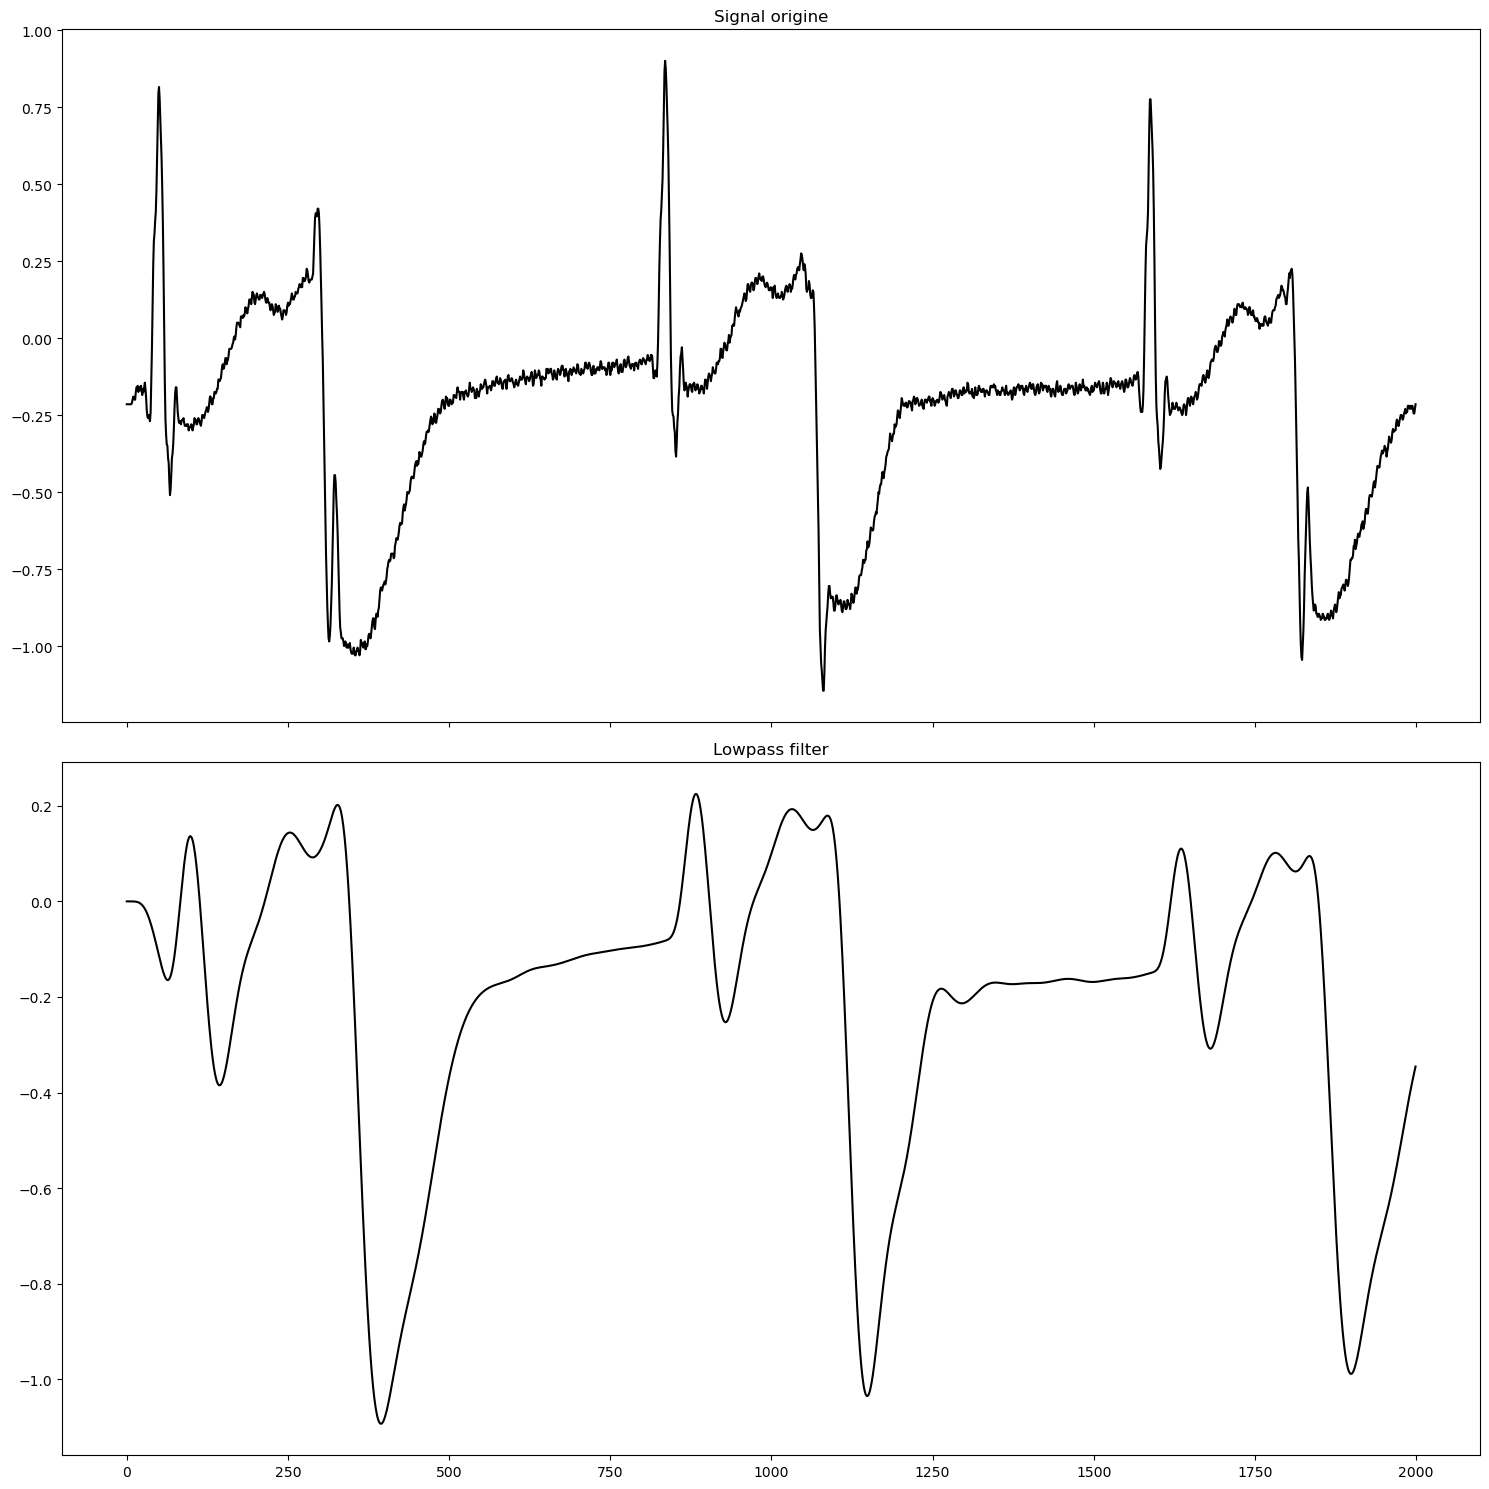

In [29]:
fig, ax = plt.subplots(2, sharex=True, figsize=(15, 15))

ax[0].plot(signal_arr, color='k')
ax[0].title.set_text("Signal origine")
plt.tight_layout()

ax[1].plot(lp_filtered_data, color='k')
ax[1].title.set_text("Lowpass filter")
plt.tight_layout()

Do you have any comments on the mangitude of these signals ? Did the shape of the origine signal change after passing through one of these filter ?

Yes the highpass filter and Bandpass filter change the magnitude/amplitude of the signal. Why ?   

# Ex5)  Discrete Wavelet Transform (DWT)
A way of splitting a signal into several frequency sub-bands is to use Discrete Wavelet transform (DWT). The output of DWT contains two sets of coefficients: the approximation coefficients and detail coefficient.


5.1 Using package pywt in Python, decompose a ECG signal using DWT. Use a Daubecchie Wavelet of order 4. Plot the approximation coeffs and detail coeffs on the same figure (using the method subplots of matplotlib )

Do you have comments on the magnitude of approximation coeffs and that of detail coeffs, compare them to that of origine signal ? Did you see the diffence between the origine signal and the approximation coeffs ?

5.2 We can again apply DWT on the approximation coefficients of the previous DWT to get the next level. The method pywt.wavedec() allows us to immediately calculate the coefficients of a higher level.  Using this method, calculate the coeffs of your signal until levels 5. Plot these coeffs on the same figure.


How many are there sets of the coeffs at level 5? Compare these sets of the coeffs to the origine signal. Which one approximates the origine signal ? What is the difference between the 6th coeffs and the detail coeffs ( in exercise 1) ?  Could you deduce how the DWT works ?

## Solution 5.1

In [32]:
import pywt
signal_arr = load_signal_using_wfdb('./dataset/mit-bih-arrhythmia-database/207', start=0, end=5000, channel = 0, pn_dir='mitdb')
approxi_coeff, detail_coeff  = pywt.dwt(signal_arr, 'db4')

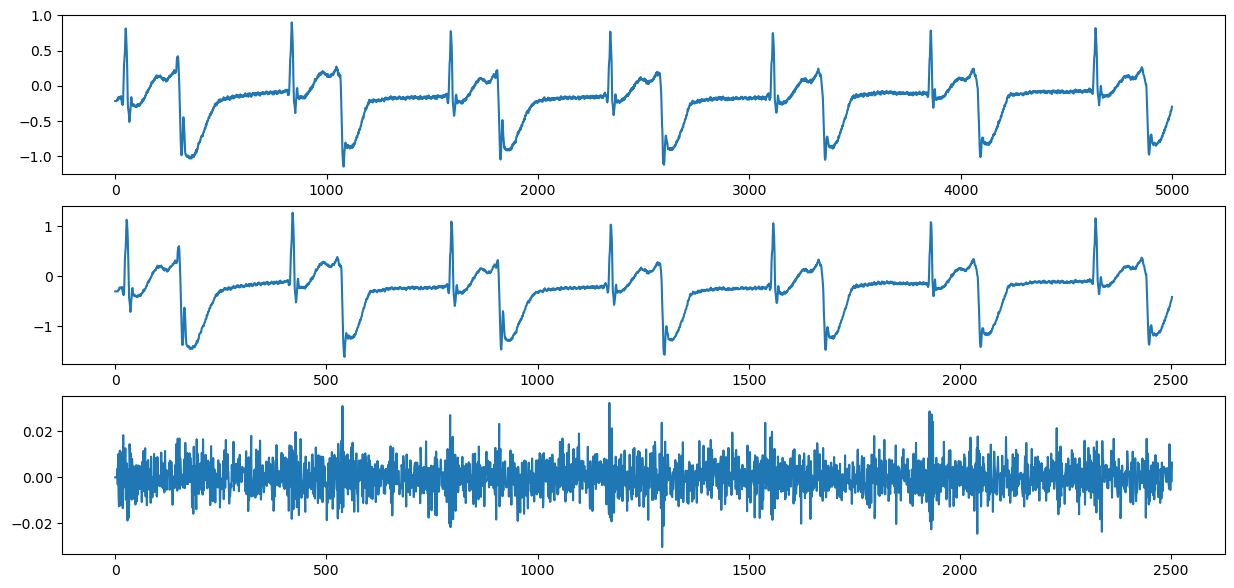

In [33]:
fix, ax = plt.subplots(3, figsize =(15,7))
ax[0].plot(signal_arr)
ax[1].plot(approxi_coeff)
ax[2].plot(detail_coeff)

----> Remark: DWT converts the signal into two signals each corresponding to diffferent frequency bands. The approximation coeffs appproximate the original. It can be used in applications like denoising from signals or compressing signals.

We see approximation coeff has the same magnitude as original signal and detail coeff has a lower magnitude. Approximation coeff describe general tendency of the signal whereas detail coeffs describe higher frequencies components of the signals comparable to noise sometimes.

### Solution 5.2

In [34]:
signal_arr = load_signal_using_wfdb('./dataset/mit-bih-arrhythmia-database/207', start=0, end=5000, channel = 0, pn_dir='mitdb')
coeff_dwt = pywt.wavedec(signal_arr, 'db4', level=5)

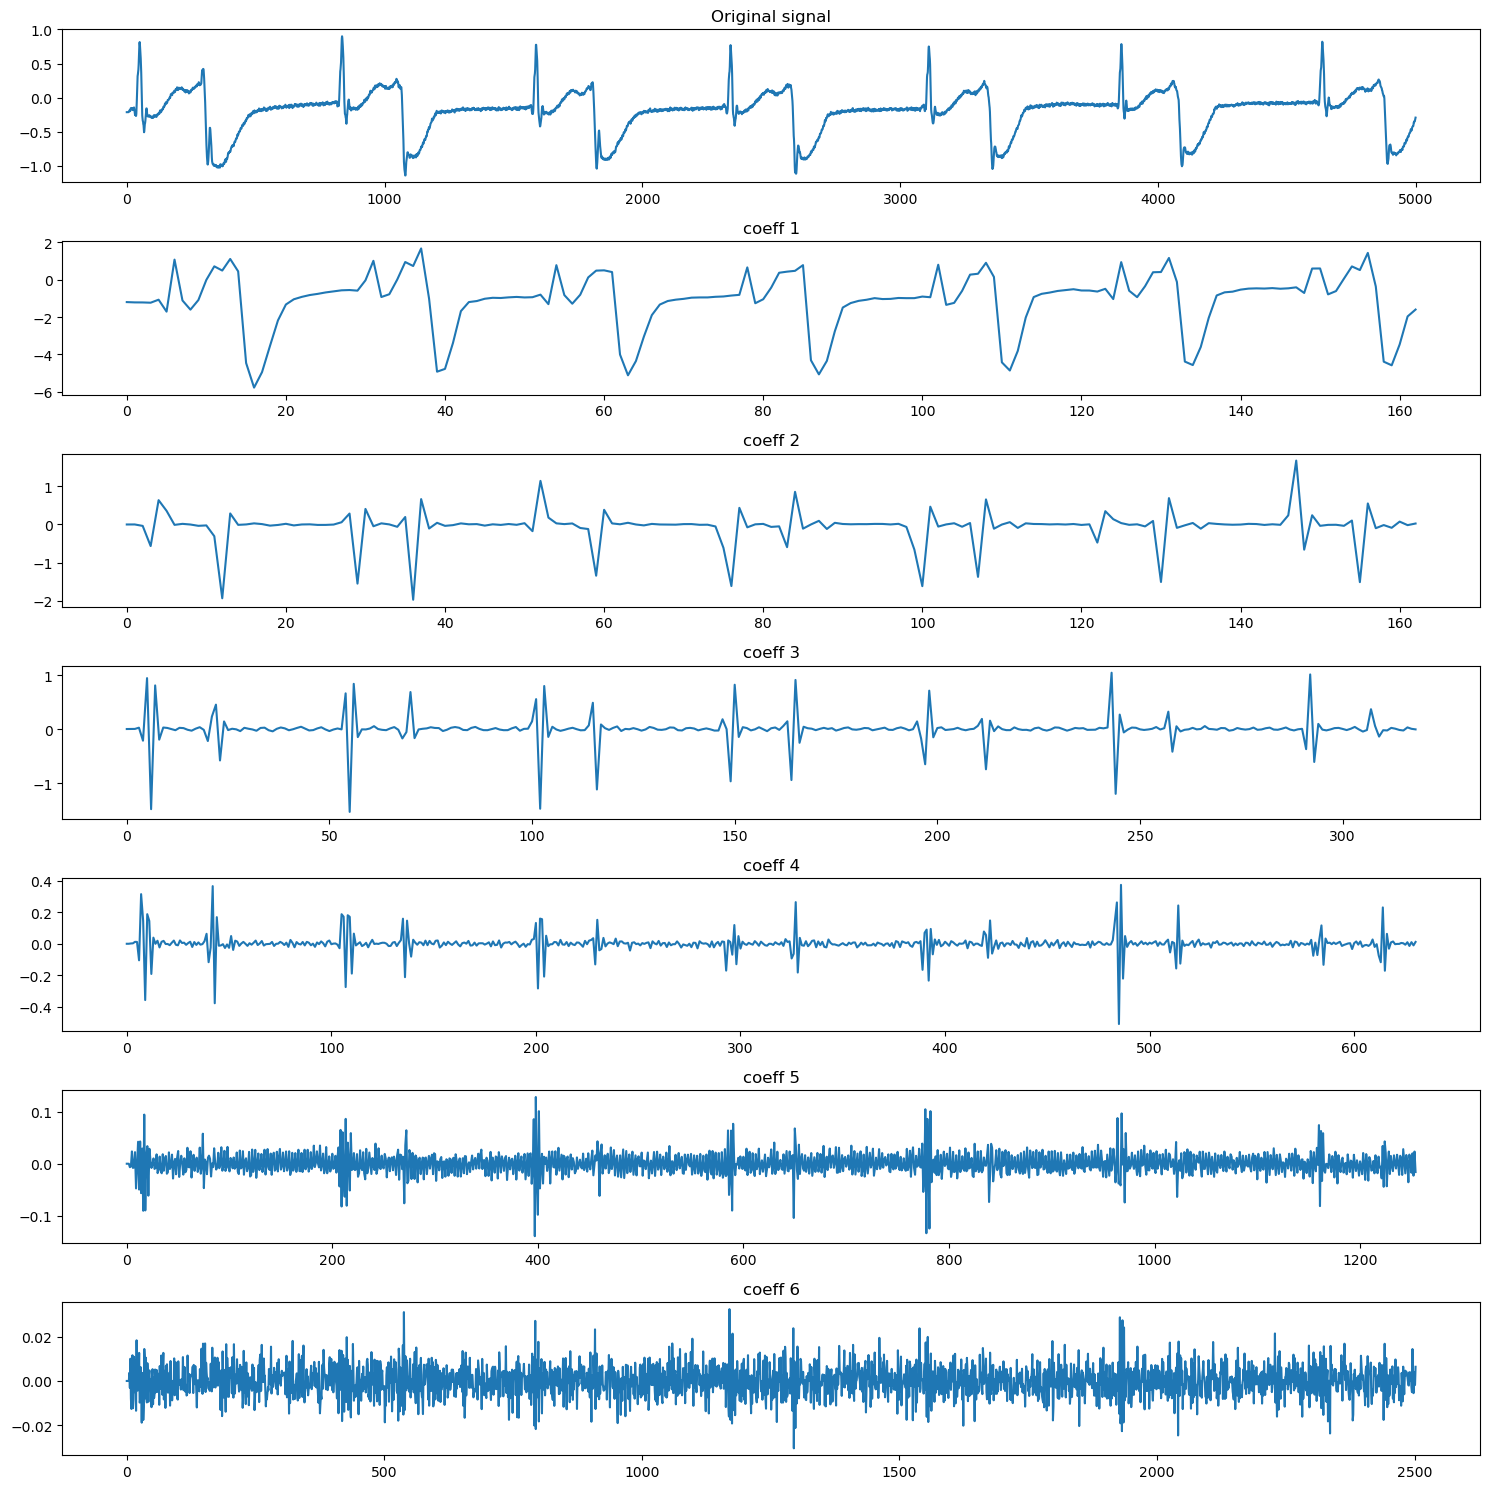

In [35]:
fix, ax = plt.subplots(len(coeff_dwt)+1, figsize =(15,15))
ax[0].plot(signal_arr)
ax[0].title.set_text("Original signal")
for i in range(len(coeff_dwt)):
    ax[i+1].plot(coeff_dwt[i])
    ax[i+1].title.set_text(f"coeff {str(i+1)}")
    plt.tight_layout()


How many are there sets of the coeffs at level 5?   
Il y a 6 coefficients.   
Compare these sets of the coeffs to the origine signal. Which one approximates the origine signal ?   
Le premier, le coefficient d'approximation.     
What is the difference between the 6th coeffs and the detail coeffs ( in exercise 1) ?    
Ce sont les mêmes.
Could you deduce how the DWT works ?
La décomposition multilevel à l'aide de la DWT fonctionne en extrayant tout d'abord les fréquences basses du signal (approximation coefficients) puis les fréquences hautes (detail coefficients). La même opération est effectuée un nombre N fois (correspondant à l'ordre de la décompositon) sur les coefficients d'approximation obtenus à l'étape d'ordre N-1.     

Ces opérations reviennent à appliquer successivement des filtres passe-bas et passe-haut.

# EX6) Feature engineering for Time series [Faire sur Nowledgeable]

lien Nowledgeable : https://nowledgeable.com/invitation/student/join-module/9c8ec467-686a-44cd-a2f2-85cf174a79ad

We will create some features for time series data.

6.1. Write a function named "calculate_statistics(x)" that returns the list of following features:

- 25th percentile value

- median value

- 75th percentile value

- min

- max

- mean

- standard deviation

- variance


6.2. Entropy values can be taken as a mesure of complexity of the signal. Write a function named "calculate_entropy(x)" that returns (Shannon) entropy of x


6.3. Zero crossing rate has been widely used in domain of speech recognition.
Create a function named "calculate_crossing(x)" that returns zero crossing rate of x.
Zero crossing rate is the number of times a signal crosses y = 0.


6.4. Write a function named "get_features(signal)" that combines the results of these functions.

## Solution

### Test

In [38]:
list_test = [np.array([1,2,3,4,5,6,7,8, 9, 10]), np.array([1]), np.random.rand(5), np.random.normal(0, 1, 1000)]
#for vector in list_test:
    #stats = calculate_statistics(vector)
    #print(stats)


### Test
Generate a normal distribution to check zero crossing rate

In [40]:
#calculate_crossing_values(x)
"""input_tests = [np.array([1,2,-3,4, 0, 1]), np.random.normal(0, 1, 1000), np.random.uniform(0,1, 100)]
for input_test in input_tests:
    print(calculate_crossing_values(input_test))"""

'input_tests = [np.array([1,2,-3,4, 0, 1]), np.random.normal(0, 1, 1000), np.random.uniform(0,1, 100)]\nfor input_test in input_tests:\n    print(calculate_crossing_values(input_test))'

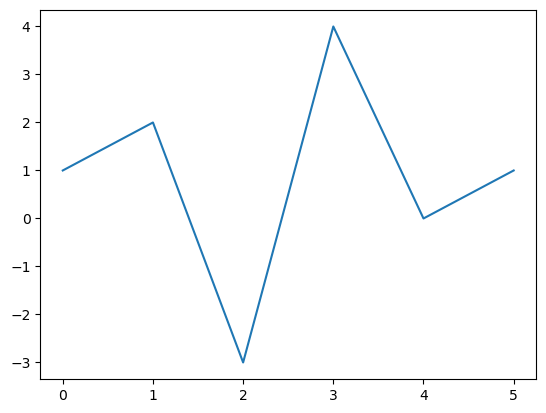

In [41]:
plt.plot(input_tests[0])

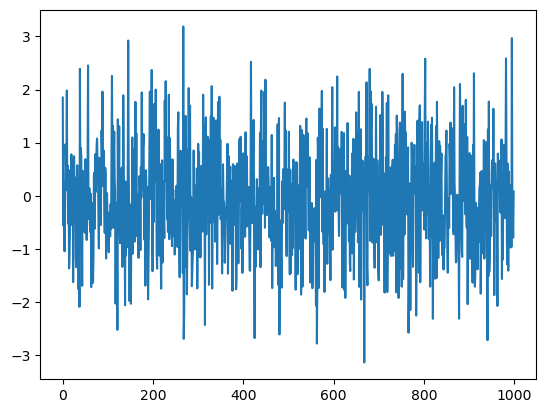

In [42]:
plt.plot(input_tests[1])

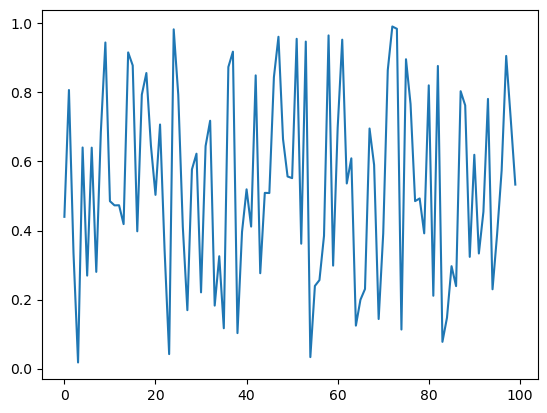

In [43]:
plt.plot(input_tests[2])

In [45]:
"""signal_arr = load_signal_using_wfdb('./dataset/mit-bih-arrhythmia-database/207', start=0, end=500000, channel = 0, pn_dir='mitdb')
coeff_dwt = pywt.wavedec(signal_arr, 'db4', level=1)
features = []
for coeff in coeff_dwt:
    features += get_features(coeff)

print(len(features))"""

"signal_arr = load_signal_using_wfdb('./dataset/mit-bih-arrhythmia-database/207', start=0, end=500000, channel = 0, pn_dir='mitdb')\ncoeff_dwt = pywt.wavedec(signal_arr, 'db4', level=1)\nfeatures = []\nfor coeff in coeff_dwt:\n    features += get_features(coeff)\n\nprint(len(features))"

# Ex7) Extract features for ECG signals [faire sur Nowledgeable]

lien Nowledgeable : https://nowledgeable.com/invitation/student/join-module/9c8ec467-686a-44cd-a2f2-85cf174a79ad

DWT is used to decompose signal into its frequency bands. Now, you will calculate the features for each set of coeffs. These features will be used as input for a classifier.


Create a function named "get_features_for_signal(signal)" that do the following tasks:
1. Calculate the coeffs of your signal until levels 3.
2. Extract features for each of these coeffs

This function returns a list of features which combine all features from each coeff.

## Solution

In [57]:
import numpy as np
def calculate_stats_features(x):
    return [np.nanmax(x), np.nanmin(x), np.nanmean(x), np.nanpercentile(x, 50), np.nanvar(x), np.nanstd(x), np.nanpercentile(x, 25), np.nanpercentile(x, 75)]

def calculate_zero_crossing(x):
    sign_changes = np.signbit(x)

    sign_differences = np.diff(sign_changes)

    zero_crossings = np.nonzero(sign_differences)[0]

    return len(zero_crossings)

def calculate_rms(x):
    return np.sqrt(np.mean(x ** 2))

def calculate_entropy(x, num_bins=100):
    # Estimate the probability density function using a histogram
    hist, bin_edges = np.histogram(x, bins=num_bins, density=True)
    
    # Compute the bin widths
    bin_widths = np.diff(bin_edges)
    
    # Compute the probabilities for each bin
    probabilities = hist * bin_widths
    
    # Filter out zero probabilities to avoid log2(0)
    probabilities = probabilities[probabilities > 0]
    
    # Compute the Shannon entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    
    return entropy

def get_features(x):
    L = []
    
    for elt in calculate_stats_features(x):
        L.append(elt)
        
    L.append(calculate_zero_crossing(x))
    L.append(calculate_rms(x))
    L.append(calculate_entropy(x)) 
    return L

In [58]:
import pywt

def extract_features_of_signal(x, waveletname, level):
    coeffs = pywt.wavedec(x, waveletname, level=level)

    features_list = [get_features(coeff) for coeff in coeffs]

    final_features = [feature for sublist in features_list for feature in sublist]

    return final_features

# Ex8) Continuous Wavelet Transform (CWT) - Scaleogram

In this exercise, you will learn about Continuous Wavelet Transform. The CWT is used for spectral analysis of signal. The CWT returns two variables: the coefficients and the frequency. CWT coefficients in form of scalogram can be used to serve as image inputs to a deep network for signal classifications.


A signal from ARR Database is loaded in the environment and store in the variable "signal_arr".

1. Using pywt library, calculate the coefficients of the signal "signal_arr".

Do you have any comments on the coefficients ? What is the shape of the coefficients ?
Does it depend on the size of the variable "scales" that you choose?

The coeffs are complex or real ? Which wavelet function did you choose ?

2. Using plt.imshow(), display together the origine signal and the magnitude of the coefficients.


## Solution

In [59]:
signal_test = load_signal_using_wfdb('./dataset/mit-bih-arrhythmia-database/201', start=0, end=2000, channel = 0, pn_dir='mitdb')
waveletname = 'morl'
scales = range(1, 128)
coeff, freqs = pywt.cwt(signal_test, scales, waveletname, 1)

In [60]:
print(coeff.shape)

(127, 2000)



The output of the CWT is a two-dimensional matrix, where each row represents a different scale and each column represents a different frequency. The values in the matrix represent the energy of the signal at that scale and frequency.

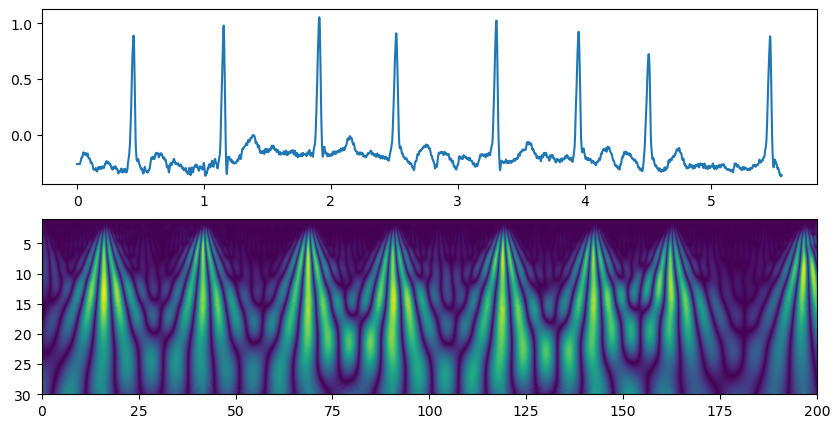

In [61]:
N = signal_test.size
sr = 360
dt = 1/sr
time = np.arange(0, N)*dt
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 5))
ax1.plot(time, signal_test)
im = ax2.imshow(abs(coeff), extent = [0, 200, 30, 1],
                interpolation = 'bilinear', aspect = 'auto')
#fig.colorbar(im)

# Ex9) Train a classifier [à faire sur Nowledgeable]

lien Nowledgeable : https://nowledgeable.com/invitation/student/join-module/9c8ec467-686a-44cd-a2f2-85cf174a79ad

The file 'ecg.csv' existed already in the environment. It was built of 81 records from the three PhysioNet databases. The data were truncated ( thanks to the function "cut_signal_into_segments"), resampled ( thanks to the fun "synchronize_signal") and passed into the function "get_features_of_signal" to get the features.

The goal of this exercise is to create a model to classify the signals.

1. Using panda, load the file 'ecg.csv' and store it in variable "df"

2. Label is located in which column? Store it in variable "y".

3. Normalise "df" avec un MinMaxScaler

4. Split "df" into df_train and df_test

5. Import a classifier then trainning the model.

6. Calculate the accuracy for df_test

In [68]:
import pandas as pd
import pywt
df = pd.read_csv("ecg.csv")
y = df['1']

df.drop(columns=['1', '0'], inplace=True)

features = []
for index, row in df.iterrows():
    feature_vector = extract_features_of_signal(row.values, 'db4', 6)
    features.append(feature_vector)

df_features = pd.DataFrame(features).astype('float')

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(-1, 1))
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

df_train, df_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.4, random_state=9)

In [73]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(df_train, y_train)
lr_train_score = lr.score(df_train, y_train)
lr_test_score = lr.score(df_test, y_test)

print(f"Logistic Regression train score: {lr_train_score}")
print(f"Logistic Regression test score: {lr_test_score}")

Logistic Regression train score: 1.0
Logistic Regression test score: 0.6666666666666666


# Ex10) Choose one proposition from Nowledgeable exercice : 12 - Improve model and test hypothesis

lien Nowledgeable : https://nowledgeable.com/invitation/student/join-module/9c8ec467-686a-44cd-a2f2-85cf174a79ad


In [74]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

# Train the models and calculate their scores
for name, model in models.items():
    model.fit(df_train, y_train)
    train_score = model.score(df_train, y_train)
    test_score = model.score(df_test, y_test)
    print(f"{name} train score: {train_score}")
    print(f"{name} test score: {test_score}")
    print("-" * 30)

Random Forest train score: 1.0
Random Forest test score: 0.6666666666666666
------------------------------
Extra Trees train score: 1.0
Extra Trees test score: 1.0
------------------------------
Gradient Boosting train score: 1.0
Gradient Boosting test score: 0.6666666666666666
------------------------------
